<a href="https://colab.research.google.com/github/samchak18/Capstone_Project_3_Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>



# Importing Libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


# Loading our dataset

In [131]:
df_original=pd.read_csv('Coronavirus Tweets.csv', encoding = 'latin-1')

Let's copy the dataset to preserve the original one

In [132]:
df1=df_original.copy()

In [133]:
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [134]:
#checking info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [135]:
df1.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

For sentiment analysis we only want tweet and sentiment Features


In [136]:
df=df1[['OriginalTweet','Sentiment']]

In [137]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [138]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [139]:
# Checking the shape of the dataset
df.shape

(41157, 2)

In [140]:
# Checking for duplicated entries
len(df[df.duplicated()])

0

#**Text Preprocessing**

## **Let us convert the tweets to LowerCase :** ##

In [141]:
df["OriginalTweet"] = df["OriginalTweet"].str.lower()
df['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

### **Removing Punctuations :**

Let's use regular expression to remove punctuations

In [142]:
df['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [143]:

df['OriginalTweet'] = df['OriginalTweet'].str.replace(r'http\S+', '', case=False, regex=True).str.strip()

df['OriginalTweet'][0]


'@menyrbie @phil_gahan @chrisitv  and  and'

In [144]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [145]:
df["clean_tweets"] = df['OriginalTweet'].apply(remove_punctuations)


In [146]:
df['clean_tweets']

,clean_tweets
0,menyrbie philgahan chrisitv and and
1,advice talk to your neighbours family to excha...
2,coronavirus australia woolworths to give elder...
3,my food stock is not the only one which is emp...
4,me ready to go at supermarket during the covid...
...,...
41152,airline pilots offering to stock supermarket s...
41153,response to complaint not provided citing covi...
41154,you know itâs getting tough when kameronwilds...
41155,is it wrong that the smell of hand sanitizer i...


In [147]:
df['clean_tweets'][0]

'menyrbie philgahan chrisitv  and  and'

### **Removing Stop Words :**

In [151]:
stop = stopwords.words('english')


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [152]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [153]:
df['clean_tweets']= df['clean_tweets'].apply(lambda x: remove_stopwords(x))

In [155]:
df.clean_tweets[6]

['cashier',
 'grocery',
 'store',
 'sharing',
 'insights',
 'covid19',
 'prove',
 'credibility',
 'commented',
 'im',
 'civics',
 'class',
 'know',
 'im',
 'talking']

### **Stemming**

**Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.**

In [156]:
stemmer = PorterStemmer()

In [157]:
#function for stemming
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [158]:
df['stemmed'] = df['clean_tweets'].apply(lambda x: stemming(x))

In [162]:
#result
print(df.stemmed[6])
print(df['clean_tweets'][6])

cashier groceri store share insight covid19 prove credibl comment im civic class know im talk
['cashier', 'grocery', 'store', 'sharing', 'insights', 'covid19', 'prove', 'credibility', 'commented', 'im', 'civics', 'class', 'know', 'im', 'talking']


### **Lemmatizing**

In [163]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmed'] = df['clean_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [168]:
pd.set_option('display.max_colwidth', None)

print(df.iloc[6, :])

OriginalTweet    cashier at grocery store was sharing his insights on #covid_19 to prove his credibility he commented "i'm in civics class so i know what i'm talking about".
Sentiment                                                                                                                                                            Positive
clean_tweets                                       [cashier, grocery, store, sharing, insights, covid19, prove, credibility, commented, im, civics, class, know, im, talking]
stemmed                                                                         cashier groceri store share insight covid19 prove credibl comment im civic class know im talk
lemmed                                              [cashier, grocery, store, sharing, insight, covid19, prove, credibility, commented, im, civics, class, know, im, talking]
Name: 6, dtype: object


### **Observation** :
**Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results.**

# **EDA**

### **Tweet Count For Each Sentiment**

In [169]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

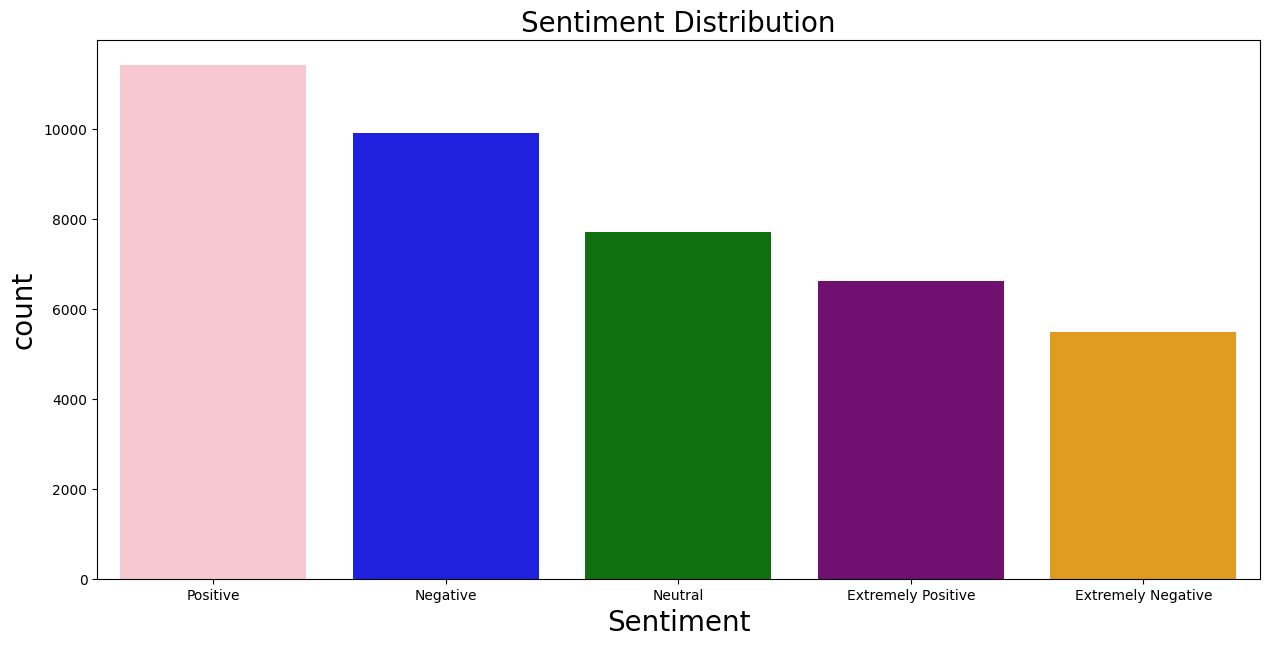

In [173]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count,palette=['pink', 'blue', 'green', 'purple', 'orange'])
ax.set_title("Sentiment Distribution", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

### **Observation** :
**Number of "Positive" sentiments are higher than all other sentiments**

In [174]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [175]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


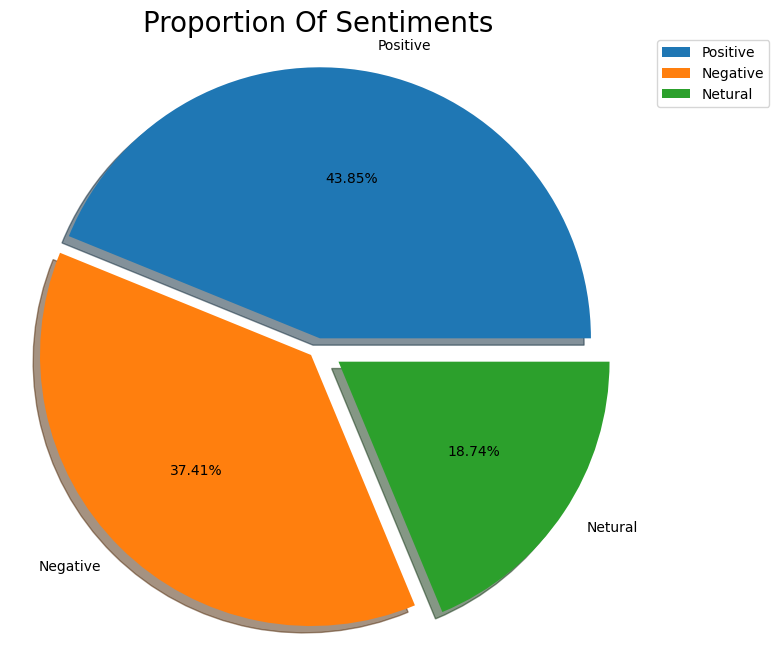

In [176]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### **Obeservation** :
**We combined Extremly Positive and Negative sentiments to positive and negative sentiments respectively.**
**As we can observe on the Pie-Plot, The total number of "Positive" sentiments are still high after combining.**

In [177]:
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())

In [191]:
# from collections import Counter
# top = Counter([item for sublist in df['temp_list'] for item in sublist])
# temp = pd.DataFrame(top.most_common(20))
# temp.columns = ['Common_words','count']
# temp.style.background_gradient(cmap='Reds')


from collections import Counter
top = Counter([item for ls in df['temp_list'] for item in ls ])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words', 'Count']
temp.style.background_gradient(cmap='Greens')

,Common_words,Count
0,"'covid19',",13286
1,"'coronavirus',",12970
2,"'prices',",7411
3,"'store',",6614
4,"'food',",6608
5,"'supermarket',",6405
6,"'grocery',",5794
7,"'people',",5030
8,"'amp',",4913
9,"'consumer',",4070


### **Obeservation** :
**Word such as 'Covid' and 'Coronavirus' are having large number of frequency  present in our dataset.**

# **Word cloud**

In [179]:
#seperating the sentiments for word cloud
neutral = pd.DataFrame(df[['stemmed','lemmed']] [df['Sentiment'] == 'Neutral'])
positive = pd.DataFrame(df[['stemmed','lemmed']]  [df['Sentiment'] == 'Positive'])
negative = pd.DataFrame(df[['stemmed','lemmed']]  [df['Sentiment'] == 'Negative'])

# **Train-Test Split**

In [180]:
#Assigning dependent and independent features
X= df['lemmed']
y=df['Sentiment']

In [181]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [182]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(28809,)


(12348,)

In [183]:
#checking splitted data
print(X_train.head())
y_train.head()

23805                                                                  [target, pull, back, store, remodels, opening, withdraws, financial, forecast, year, coronavirus, spread, mary, hanbury, report]
31828                                                       [breaking, msf, call, patent, profiteering, drug, test, vaccine, pandemic, rationing, high, price, insufficient, supply, prolong, pandemic]
24504                                                                                                                                 [coronavirus, spread, world, leader, get, tough, price, collapse]
17281    [store, shelf, empty, people, selling, certain, product, inflated, price, barnardecon, professor, homa, zarghamee, explains, price, discrimination, look, like, age, coronavirus, marketplace]
11488                                                                                                        [frescos4u, normal, night, final, reduction, nothing, covid19, common, every, supermarket]


,Sentiment
23805,Neutral
31828,Negative
24504,Negative
17281,Positive
11488,Neutral


# **Count Vectorization (Bag of words) and TF/IDF Vecorization**

In [184]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [185]:
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())


In [186]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [187]:
tv_X_train.shape

(28809, 17662)

In [188]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())
tv_X_test=tv.transform(X_test.astype(str).str.strip())

# **Implementing Models** (Bag of Words) by **Count Vectoriser**

##  Logistic Regression Count Vectoriser Method with Gridsearch CV

In [189]:
#Initalizing the model
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)

#fitting the data to model
logreg_Gcv.fit(cv_X_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [192]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(cv_X_test)

In [193]:
pred_lr_cv

array(['Positive', 'Negative', 'Neutral', ..., 'Neutral', 'Negative',
       'Positive'], dtype=object)

In [194]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7829608033689667


In [195]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.79      0.79      4620
     Neutral       0.68      0.68      0.68      2314
    Positive       0.82      0.82      0.82      5414

    accuracy                           0.78     12348
   macro avg       0.76      0.76      0.76     12348
weighted avg       0.78      0.78      0.78     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

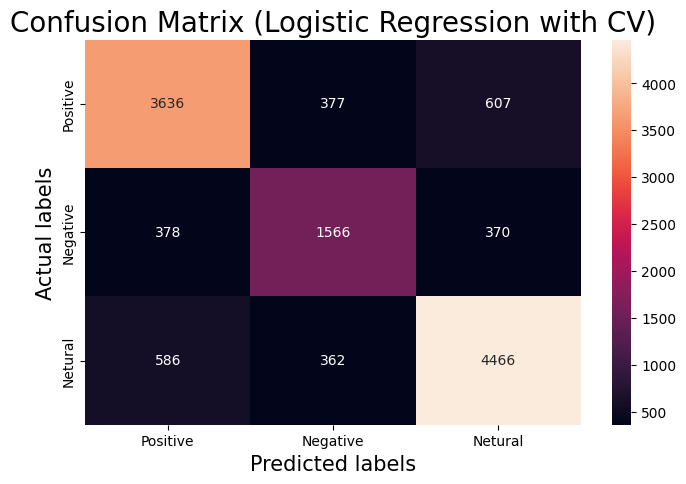

In [196]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** :
**This model gives an accuracy score of 78.28% which implies that our model is performing well.**

# Decision Tree Classifier with CV

In [197]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(cv_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(cv_X_test)

In [198]:
pred_dt_cv

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Negative',
       'Positive'], dtype=object)

In [199]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.687076833109393


In [200]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.70      0.67      0.69      4620
     Neutral       0.61      0.66      0.63      2314
    Positive       0.75      0.74      0.74      5414

    accuracy                           0.70     12348
   macro avg       0.68      0.69      0.69     12348
weighted avg       0.70      0.70      0.70     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

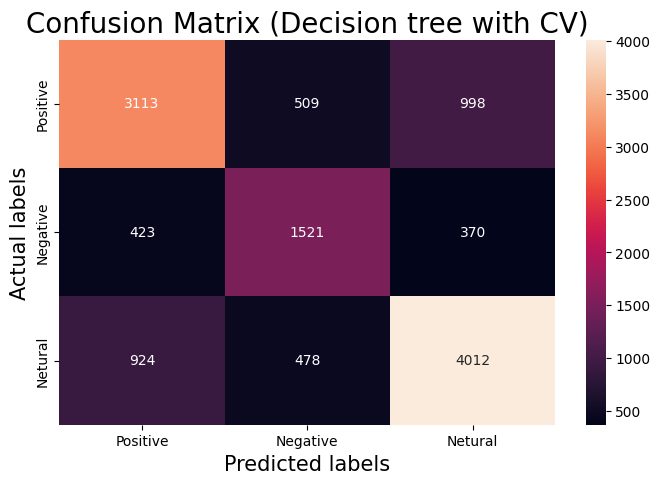

In [201]:
#Plotting Confussion matrix
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** :
**This model gives an accuracy score of 69.04%.**

#  **SVM** with **CV**

In [202]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(cv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(cv_X_test)

In [203]:
pred_svm_cv

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [204]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7589893100097181


In [205]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.77      0.75      0.76      4620
     Neutral       0.66      0.67      0.66      2314
    Positive       0.79      0.81      0.80      5414

    accuracy                           0.76     12348
   macro avg       0.74      0.74      0.74     12348
weighted avg       0.76      0.76      0.76     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

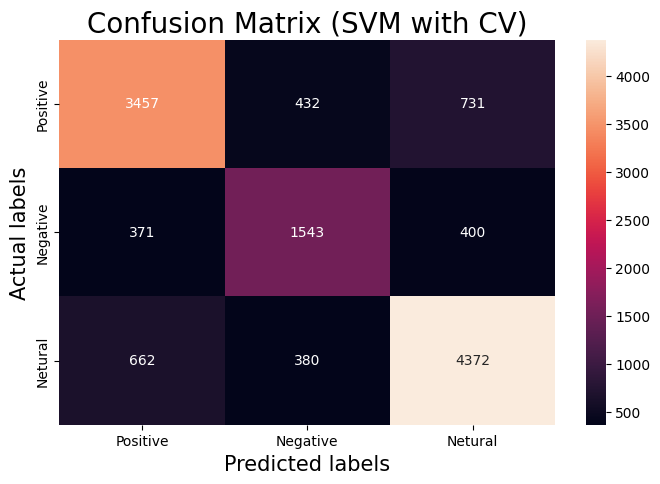

In [206]:
#Plotting Confussion matrix
cf5= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** :
**This model gives an accuracy score of 76% which implies that our model is performing well.**

# **Implementing Models** by **TF/IDF Vectorizer**

##  **Logistic Regression TF/IDF vectorizer** with **GridsearchCV**

In [207]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

#fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [208]:
#predicted values
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)

In [209]:
pred_lr_tv_Gcv

array(['Positive', 'Negative', 'Neutral', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

In [210]:
#Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))

Accuracy : 0.7726757369614512


In [211]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

              precision    recall  f1-score   support

    Negative       0.78      0.78      0.78      4620
     Neutral       0.66      0.63      0.64      2314
    Positive       0.81      0.83      0.82      5414

    accuracy                           0.77     12348
   macro avg       0.75      0.75      0.75     12348
weighted avg       0.77      0.77      0.77     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

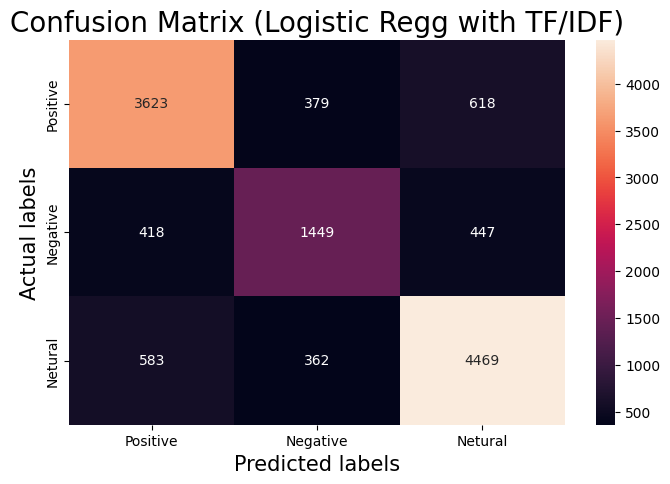

In [212]:
#Plotting Confussion matrix
cf1a= (confusion_matrix(y_test,pred_lr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** :
**This model gives an accuracy score of 77% which implies that our model is performing well.**

### **Observation** :
**This model gives an accuracy score of 60% which implies that our model is performing well.**

#  **SVM** with **TF/ID**

In [ ]:
# Initializing model
svm_tv = SVC()

#fitting the data to model
svm_tv.fit(tv_X_train,y_train)

#prediction
pred_svm_tv = svm_tv.predict(tv_X_test)

In [ ]:
pred_svm_tv

In [ ]:
# Accuracy
accuracy_svm_tv = accuracy_score(y_test,pred_svm_tv)
print("Accuracy :",(accuracy_svm_tv))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_tv))

In [ ]:
#Plotting Confussion matrix
cf5a= (confusion_matrix(y_test,pred_svm_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** :
**This model gives an accuracy score of 76% which implies that our model is performing well.**

# **Conclusions:**

 We conclude that the machine is generating best results for Logistic Regression with Grid Search CV model with and Accuracy score of 78.28% and 77.43% respectively for Count vector and TF/idf Vector, followed by SVM

 Also, we observed that no overfitting is seen for the data, and we can deploy this model.

The sentiments of future tweets can be easily predicted using this model.
